In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


In [2]:
import pandas as pd # Library to manipulate dataframes
import numpy as np # To manilupate arrays
import matplotlib.pyplot as plt # to plot graphs and charts
import seaborn as sns # statistical graphs and charts

# **Loading the data and EDA**

# Loading The Data

In [3]:
train=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')
sample=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv')
print(train.shape)
print(test.shape)
print(sample.shape)

(175000, 17)
(50000, 16)
(1000, 2)


# Basic analysis

In [4]:
train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

There are 17 columns out of which "total_amount" is the label column. We have 175000 rows in the training data.

In [6]:
train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


From the statistical description and the information about the attributes given in the description of the kaggle competition, it is observed that VendorID, RatecodeID, PULocationID, DOLocationID are categorical columns but contain numerical values. store_and_fwd_flag, payment_type and both timestamps are pure categorical variables, the timestamps will require feature engineering to extract time features from them.

In [7]:
train["VendorID"].value_counts()

VendorID
1    127340
0     47597
2        63
Name: count, dtype: int64

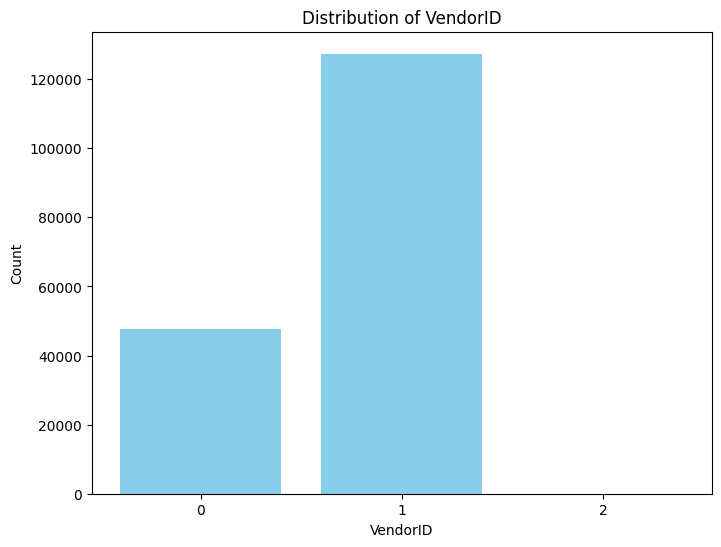

In [8]:
import matplotlib.pyplot as plt

vendor_counts = train['VendorID'].value_counts()
vendor_categories = vendor_counts.index.tolist()

plt.figure(figsize=(8, 6))
plt.bar(vendor_categories, vendor_counts, color='skyblue')
plt.xlabel('VendorID')
plt.ylabel('Count')
plt.title('Distribution of VendorID')
plt.xticks(vendor_categories)
plt.show()


In [9]:
train["RatecodeID"].value_counts()

RatecodeID
1.0     158652
2.0       7314
5.0       1036
99.0       748
3.0        727
4.0        446
Name: count, dtype: int64

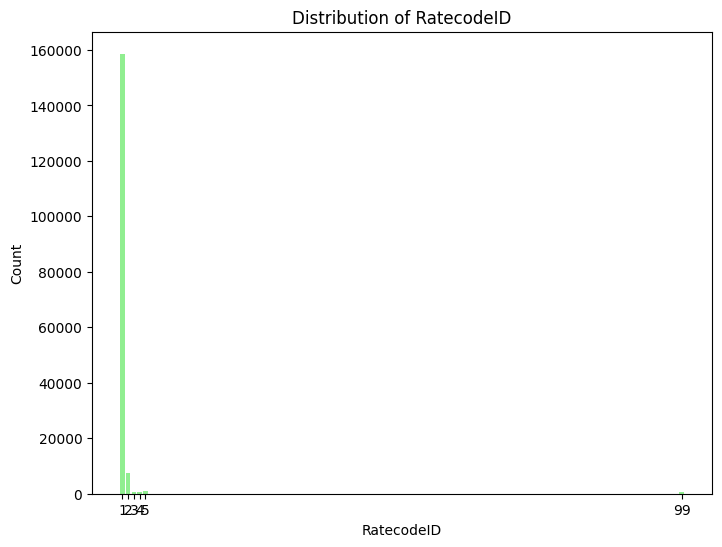

In [10]:
ratecode_counts = train['RatecodeID'].value_counts()
ratecode_categories = ratecode_counts.index.tolist()

plt.figure(figsize=(8, 6))
plt.bar(ratecode_categories, ratecode_counts, color='lightgreen')
plt.xlabel('RatecodeID')
plt.ylabel('Count')
plt.title('Distribution of RatecodeID')
plt.xticks(ratecode_categories)
plt.show()


In [11]:
train["PULocationID"].value_counts()

PULocationID
264    730
85     725
43     719
162    718
97     717
      ... 
254    613
94     613
153    611
179    606
252    606
Name: count, Length: 264, dtype: int64

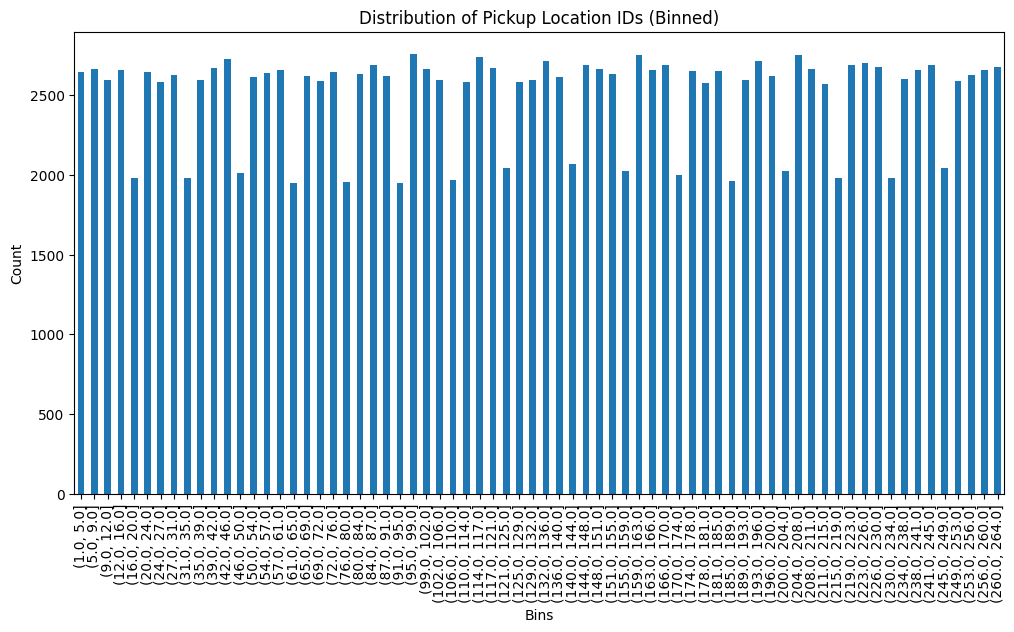

In [12]:
bins = pd.cut(train['PULocationID'], bins=70, precision=0).value_counts().sort_index()
bins.plot(kind='bar', figsize=(12, 6)).set(
    title='Distribution of Pickup Location IDs (Binned)', xlabel='Bins', ylabel='Count'
)
plt.show()


In [13]:
train["DOLocationID"].value_counts()

DOLocationID
263    759
127    736
37     729
115    726
254    721
      ... 
9      611
140    610
195    607
187    606
183    605
Name: count, Length: 264, dtype: int64

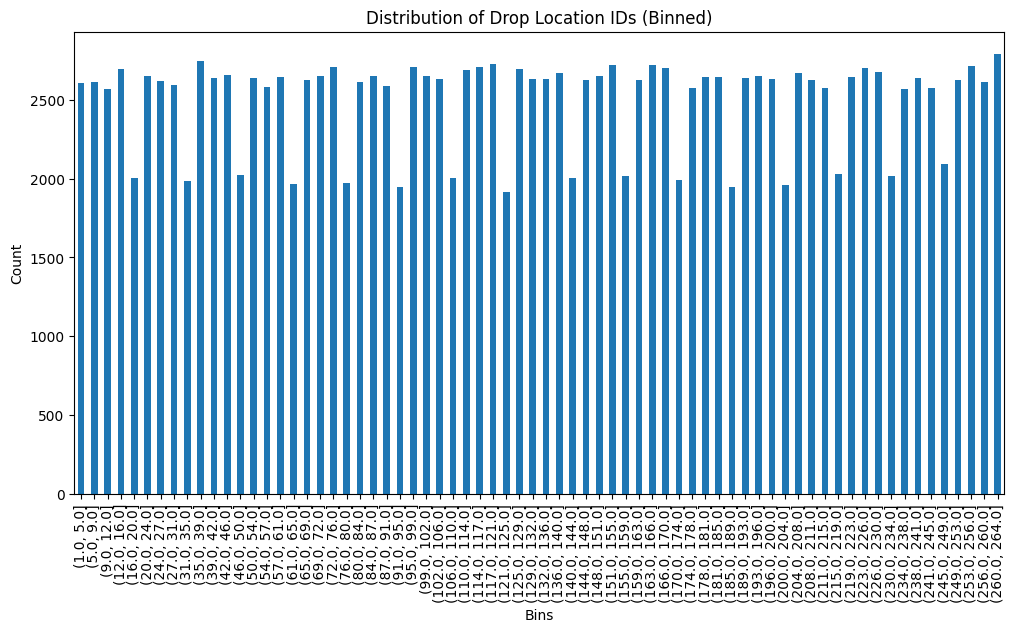

In [14]:
bins = pd.cut(train['DOLocationID'], bins=70, precision=0).value_counts().sort_index()
bins.plot(kind='bar', figsize=(12, 6)).set(
    title='Distribution of Drop Location IDs (Binned)', xlabel='Bins', ylabel='Count'
)
plt.show()

In [15]:
train["store_and_fwd_flag"].value_counts()

store_and_fwd_flag
N    167729
Y      1194
Name: count, dtype: int64

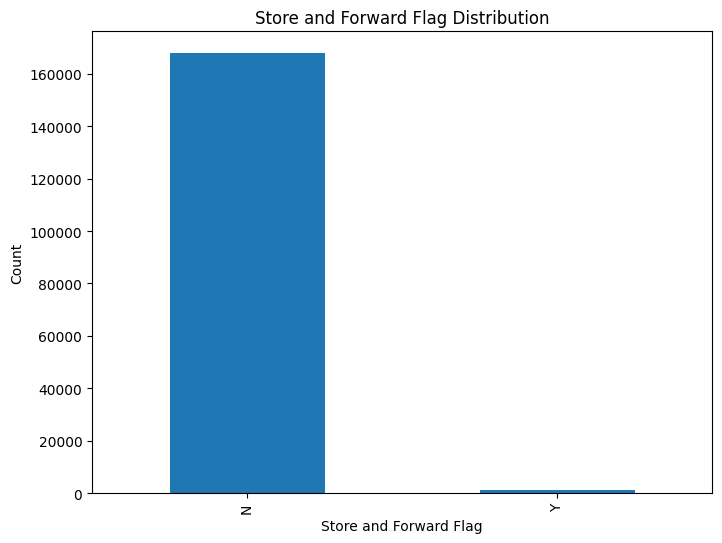

In [16]:
store_and_fwd_flag_counts = train['store_and_fwd_flag'].value_counts()

store_and_fwd_flag_counts.plot(kind='bar', figsize=(8, 6)).set(
    title='Store and Forward Flag Distribution', xlabel='Store and Forward Flag', ylabel='Count'
)
plt.show()


In [17]:
train["payment_type"].value_counts()

payment_type
Credit Card    135257
Cash            30141
Wallet           6077
unknown          2333
UPI              1192
Name: count, dtype: int64

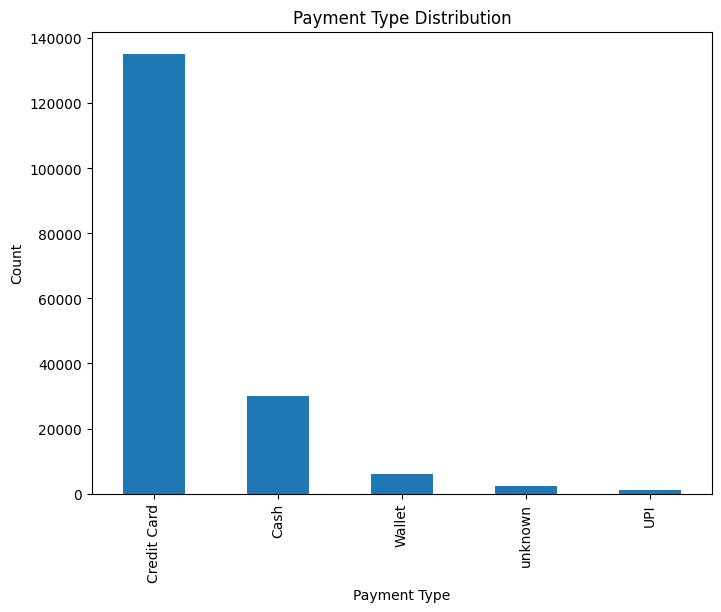

In [18]:
payment_type_counts = train['payment_type'].value_counts()

payment_type_counts.plot(kind='bar', figsize=(8, 6)).set(
    title='Payment Type Distribution', xlabel='Payment Type', ylabel='Count'
)
plt.show()


**It is observed that VendorID, RatecodeID, store_and_fwd_flag and payment_type columns have class imbalance, handling this imbalance can be considered if future models underperform.**

# **Visualization and preprocessing**

For further analysis, exploration and preprocessing, the training dataset is copied into a separate exploration set so that it can be manipulated freely.

In [19]:
exploration_set=train.copy()

Since store_and_fwd_flag has almost all values of the type "N", it cannot contribute much to the prediction, hence it is safe to drop it.

In [20]:
exploration_set.drop("store_and_fwd_flag", axis=1, inplace=True)
exploration_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   PULocationID           175000 non-null  int64  
 7   DOLocationID           175000 non-null  int64  
 8   payment_type           175000 non-null  object 
 9   extra                  175000 non-null  float64
 10  tip_amount             175000 non-null  float64
 11  tolls_amount           175000 non-null  float64
 12  improvement_surcharge  175000 non-null  float64
 13  total_amount           175000 non-null  float64
 14  congestion_surcharge   168923 non-nu

*Preprocessing pipeline step1:
drop the column "store_and_fwd_flag"*

In [21]:
exploration_set.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


**Pure numerical columns (no imputation needed) visualised:**

In [22]:
exploration_set["extra"].value_counts()

extra
 0.00     51247
 2.50     50180
 1.00     35614
 5.00     17280
 3.50     11839
 7.50      2351
 6.00      1774
 4.25       871
 9.25       812
-1.00       514
-2.50       472
 1.75       413
 2.75       375
 6.75       284
 11.75      258
 10.25      231
 7.75       199
 10.00       96
-5.00        76
 8.50        56
-7.50        22
-6.00        21
 5.25         8
 0.75         2
 3.25         2
 0.25         1
 0.11         1
 1.50         1
Name: count, dtype: int64

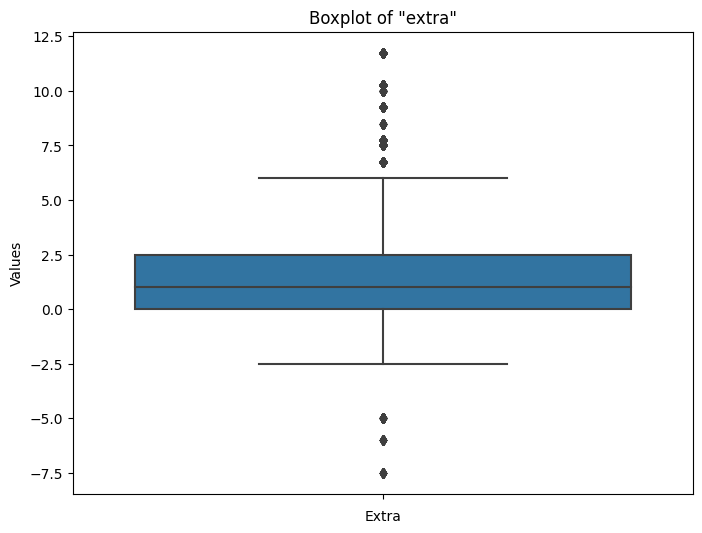

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=exploration_set, y='extra')
plt.xlabel('Extra')
plt.ylabel('Values')
plt.title('Boxplot of "extra"')
plt.show()

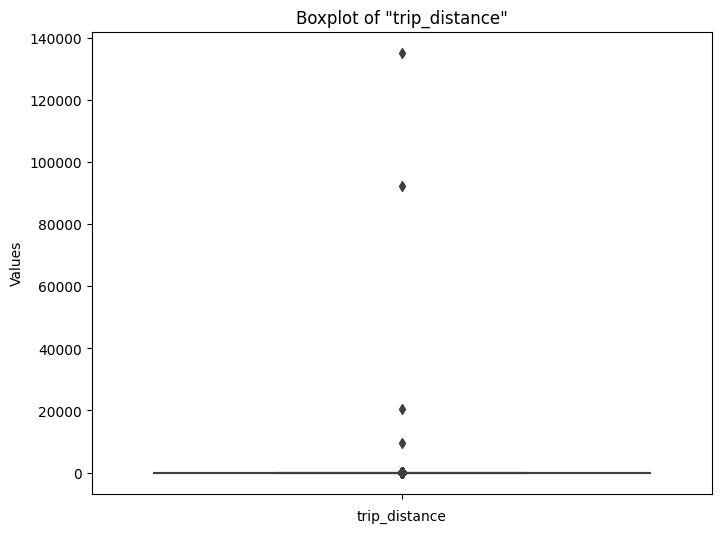

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=exploration_set, y='trip_distance')
plt.xlabel('trip_distance')
plt.ylabel('Values')
plt.title('Boxplot of "trip_distance"')
plt.show()

In [25]:
exploration_set["trip_distance"].value_counts()

trip_distance
0.00     2632
1.00     2431
0.90     2383
1.20     2363
1.10     2297
         ... 
31.42       1
26.80       1
27.53       1
13.29       1
15.17       1
Name: count, Length: 2929, dtype: int64

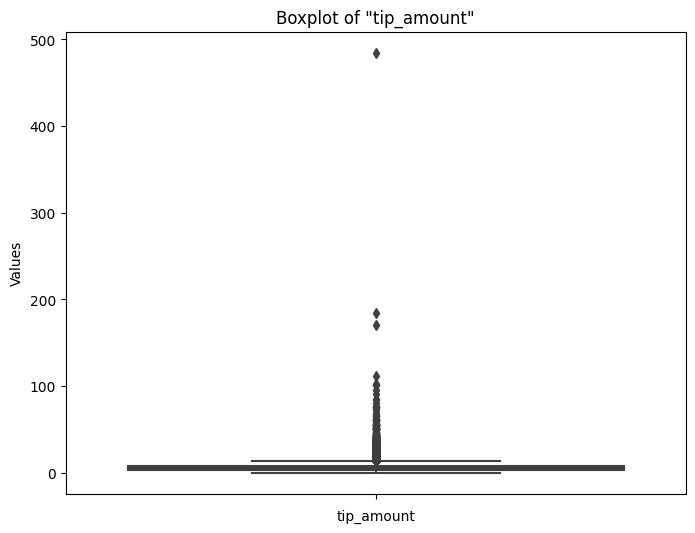

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=exploration_set, y='tip_amount')
plt.xlabel('tip_amount')
plt.ylabel('Values')
plt.title('Boxplot of "tip_amount"')
plt.show()

In [27]:
exploration_set["tip_amount"].value_counts()

tip_amount
7.165589     1
3.850730     1
5.311822     1
9.137562     1
6.716744     1
            ..
11.560123    1
3.256321     1
6.093614     1
1.099215     1
6.541699     1
Name: count, Length: 175000, dtype: int64

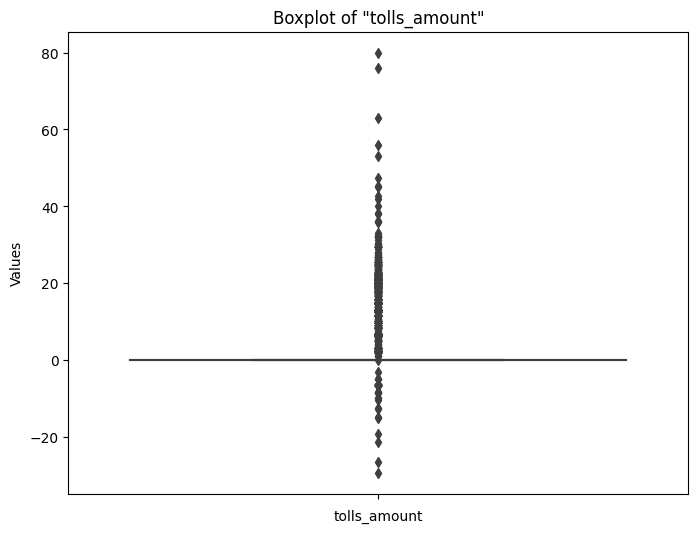

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=exploration_set, y='tolls_amount')
plt.xlabel('tolls_amount')
plt.ylabel('Values')
plt.title('Boxplot of "tolls_amount"')
plt.show()

In [29]:
exploration_set["tolls_amount"].value_counts()

tolls_amount
0.00     159328
6.55      14011
12.75       254
14.75       209
3.00        132
          ...  
63.00         1
18.64         1
15.10         1
20.50         1
14.99         1
Name: count, Length: 214, dtype: int64

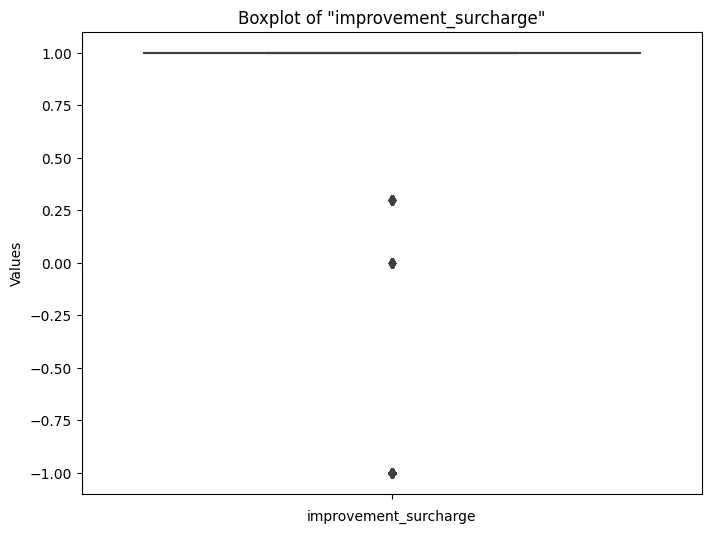

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=exploration_set, y='improvement_surcharge')
plt.xlabel('improvement_surcharge')
plt.ylabel('Values')
plt.title('Boxplot of "improvement_surcharge"')
plt.show()

In [31]:
exploration_set["improvement_surcharge"].value_counts()

improvement_surcharge
 1.0    173145
-1.0      1725
 0.3        85
 0.0        45
Name: count, dtype: int64

Most of the numerical columns display a boxplot primarily consisting of outliers without a visible box, it typically indicates that the data has a very wide range and is highly dispersed, making it challenging to represent the majority of the data within the boxplot's default scale.

This implies that the data contains extreme values that are significantly distant from the median and quartiles of the dataset.

In [32]:
exploration_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   PULocationID           175000 non-null  int64  
 7   DOLocationID           175000 non-null  int64  
 8   payment_type           175000 non-null  object 
 9   extra                  175000 non-null  float64
 10  tip_amount             175000 non-null  float64
 11  tolls_amount           175000 non-null  float64
 12  improvement_surcharge  175000 non-null  float64
 13  total_amount           175000 non-null  float64
 14  congestion_surcharge   168923 non-nu

# **Pre-Processing**

# Imputation

In [33]:
missing_values = exploration_set.isnull().sum()
print(missing_values[missing_values > 0])

passenger_count         6077
RatecodeID              6077
congestion_surcharge    6077
Airport_fee             6077
dtype: int64


There are same number of missing values in 5 columns of the dataset, this could mean that these are the same rows that have missing values in them and they have a relation/potential pattern for the missing values. Exploring it further:

In [34]:
missing_cols = ['passenger_count', 'RatecodeID', 'congestion_surcharge', 'Airport_fee']
missing_data = exploration_set[exploration_set[missing_cols].isnull().any(axis=1)]
print(missing_data)

        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
33             1  2023-06-29 23:59:24   2023-06-29 23:10:40              NaN   
53             1  2023-06-30 02:43:08   2023-06-30 03:44:22              NaN   
56             1  2023-06-30 22:28:53   2023-06-30 23:33:12              NaN   
120            0  2023-06-28 22:24:34   2023-06-28 21:57:57              NaN   
127            0  2023-06-28 21:19:33   2023-06-28 22:56:28              NaN   
...          ...                  ...                   ...              ...   
174925         1  2023-06-28 20:24:56   2023-06-28 20:10:58              NaN   
174935         1  2023-06-29 09:07:59   2023-06-29 08:39:05              NaN   
174983         1  2023-06-30 21:57:30   2023-06-30 20:55:40              NaN   
174985         1  2023-06-30 08:12:28   2023-06-30 08:36:47              NaN   
174986         1  2023-06-29 22:23:35   2023-06-29 22:36:11              NaN   

        trip_distance  RatecodeID  PULo

In [35]:
wallet_missing_values = exploration_set[exploration_set['payment_type'] == 'Wallet'][missing_cols]
print(wallet_missing_values)

        passenger_count  RatecodeID  congestion_surcharge  Airport_fee
33                  NaN         NaN                   NaN          NaN
53                  NaN         NaN                   NaN          NaN
56                  NaN         NaN                   NaN          NaN
120                 NaN         NaN                   NaN          NaN
127                 NaN         NaN                   NaN          NaN
...                 ...         ...                   ...          ...
174925              NaN         NaN                   NaN          NaN
174935              NaN         NaN                   NaN          NaN
174983              NaN         NaN                   NaN          NaN
174985              NaN         NaN                   NaN          NaN
174986              NaN         NaN                   NaN          NaN

[6077 rows x 4 columns]


All of the missing rows have payment_type as "wallet".

In [36]:
missing_rows_index = exploration_set[missing_cols].loc[exploration_set[missing_cols].isnull().any(axis=1)].index
wallet_rows_index = exploration_set[exploration_set['payment_type'] == 'Wallet'].index
print(len(missing_rows_index),len(wallet_rows_index))

6077 6077


In [37]:
if set(missing_rows_index)==set(wallet_rows_index):
    print("True")
else:
    print("False")

True


All the rows which have payment type as wallet have missing values, these rows cannot be removed as the whole bin of rows which have payment_type as wallet will be removed. Thus, there is a need to impute these values.

The categorical variable, RatecodeID can be imputed through the most-frequent-category (mode) value of the column, the numerical columns' imputation strategy can be decided after further analyzing their distributions.

In [38]:
exploration_set[["RatecodeID"]]

,RatecodeID
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
174995,1.0
174996,1.0
174997,1.0
174998,1.0


In [39]:
from sklearn.impute import SimpleImputer
rate_code_id_imputer=SimpleImputer(strategy='most_frequent')

exploration_set["RatecodeID"]=rate_code_id_imputer.fit_transform(exploration_set[["RatecodeID"]])
exploration_set.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID                  0
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [40]:
exploration_set["passenger_count"].value_counts()

passenger_count
1.0    128534
2.0     24316
3.0      6018
4.0      3668
0.0      2818
5.0      1970
6.0      1596
8.0         2
9.0         1
Name: count, dtype: int64

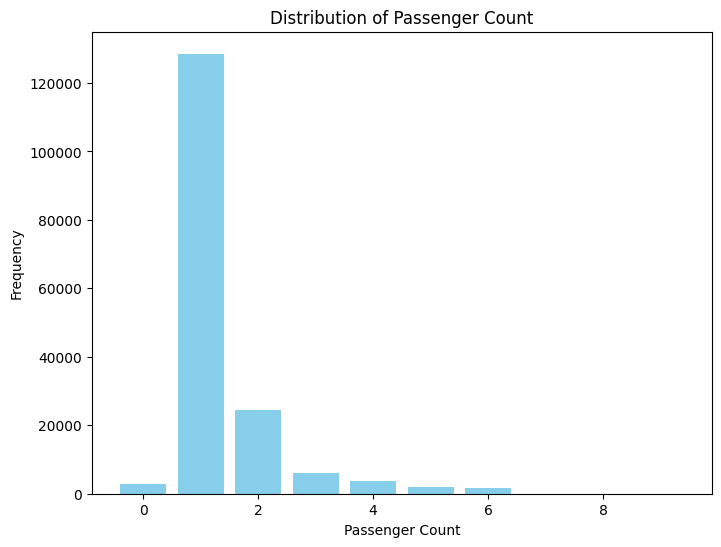

In [41]:
passenger_count_counts = exploration_set['passenger_count'].value_counts()
passenger_count_counts = passenger_count_counts.sort_index()

plt.figure(figsize=(8, 6))
plt.bar(passenger_count_counts.index, passenger_count_counts.values, color='skyblue')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Count')
plt.show()

Since the distribution is skewed and the values like 8 and 9 occur only 3/175000, this column should be imputed with median strategy.

In [42]:
passenger_count_imputer=SimpleImputer(strategy="median")
exploration_set["passenger_count"]=passenger_count_imputer.fit_transform(exploration_set[["passenger_count"]])
exploration_set.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [43]:
exploration_set["congestion_surcharge"].value_counts()

congestion_surcharge
 2.5    153212
 0.0     14325
-2.5      1386
Name: count, dtype: int64

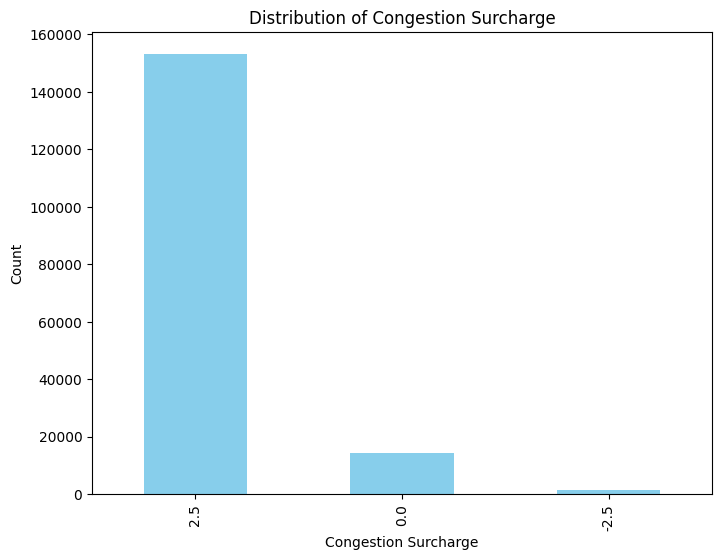

In [44]:
congestion_surcharge_counts = exploration_set['congestion_surcharge'].value_counts()

plt.figure(figsize=(8, 6))
congestion_surcharge_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Congestion Surcharge')
plt.ylabel('Count')
plt.title('Distribution of Congestion Surcharge')
plt.show()

This distribution is also skewed, so median/mode can be used to impute this but in this case the median and mode both will come out to be 2.5 so, either can be chosen here.

In [45]:
congestion_surcharge_imputer=SimpleImputer(strategy="median")
exploration_set["congestion_surcharge"]=congestion_surcharge_imputer.fit_transform(exploration_set[["congestion_surcharge"]])
exploration_set.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
Airport_fee              6077
dtype: int64

In [46]:
exploration_set["Airport_fee"].value_counts()

Airport_fee
 0.00    153074
 1.75     15590
-1.75       259
Name: count, dtype: int64

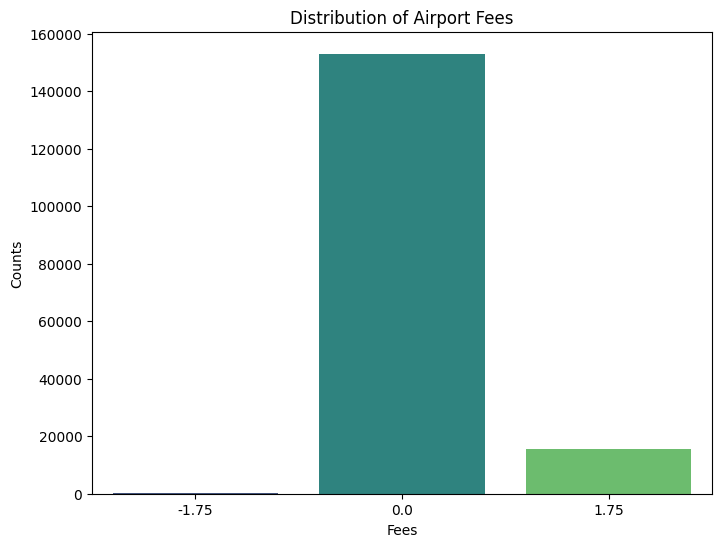

In [47]:
airport_fee_counts = train['Airport_fee'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=airport_fee_counts.index, y=airport_fee_counts.values, palette='viridis')

plt.title('Distribution of Airport Fees')
plt.xlabel('Fees')
plt.ylabel('Counts')

plt.show()

This distribution is also skewed, so median/mode can be used to impute this but in this case the median and mode both will come out to be 0.0 so, either can be chosen here.

In [48]:
airport_fee_imputer=SimpleImputer(strategy="median")
exploration_set["Airport_fee"]=airport_fee_imputer.fit_transform(exploration_set[["Airport_fee"]])
exploration_set.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

*Preprocessing pipeline step 2: impute the columns "RatecodeID", "passenger_count", "congestion_surcharge" and "Airport_fee" with their respective imputer objects*

**Further visualization**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


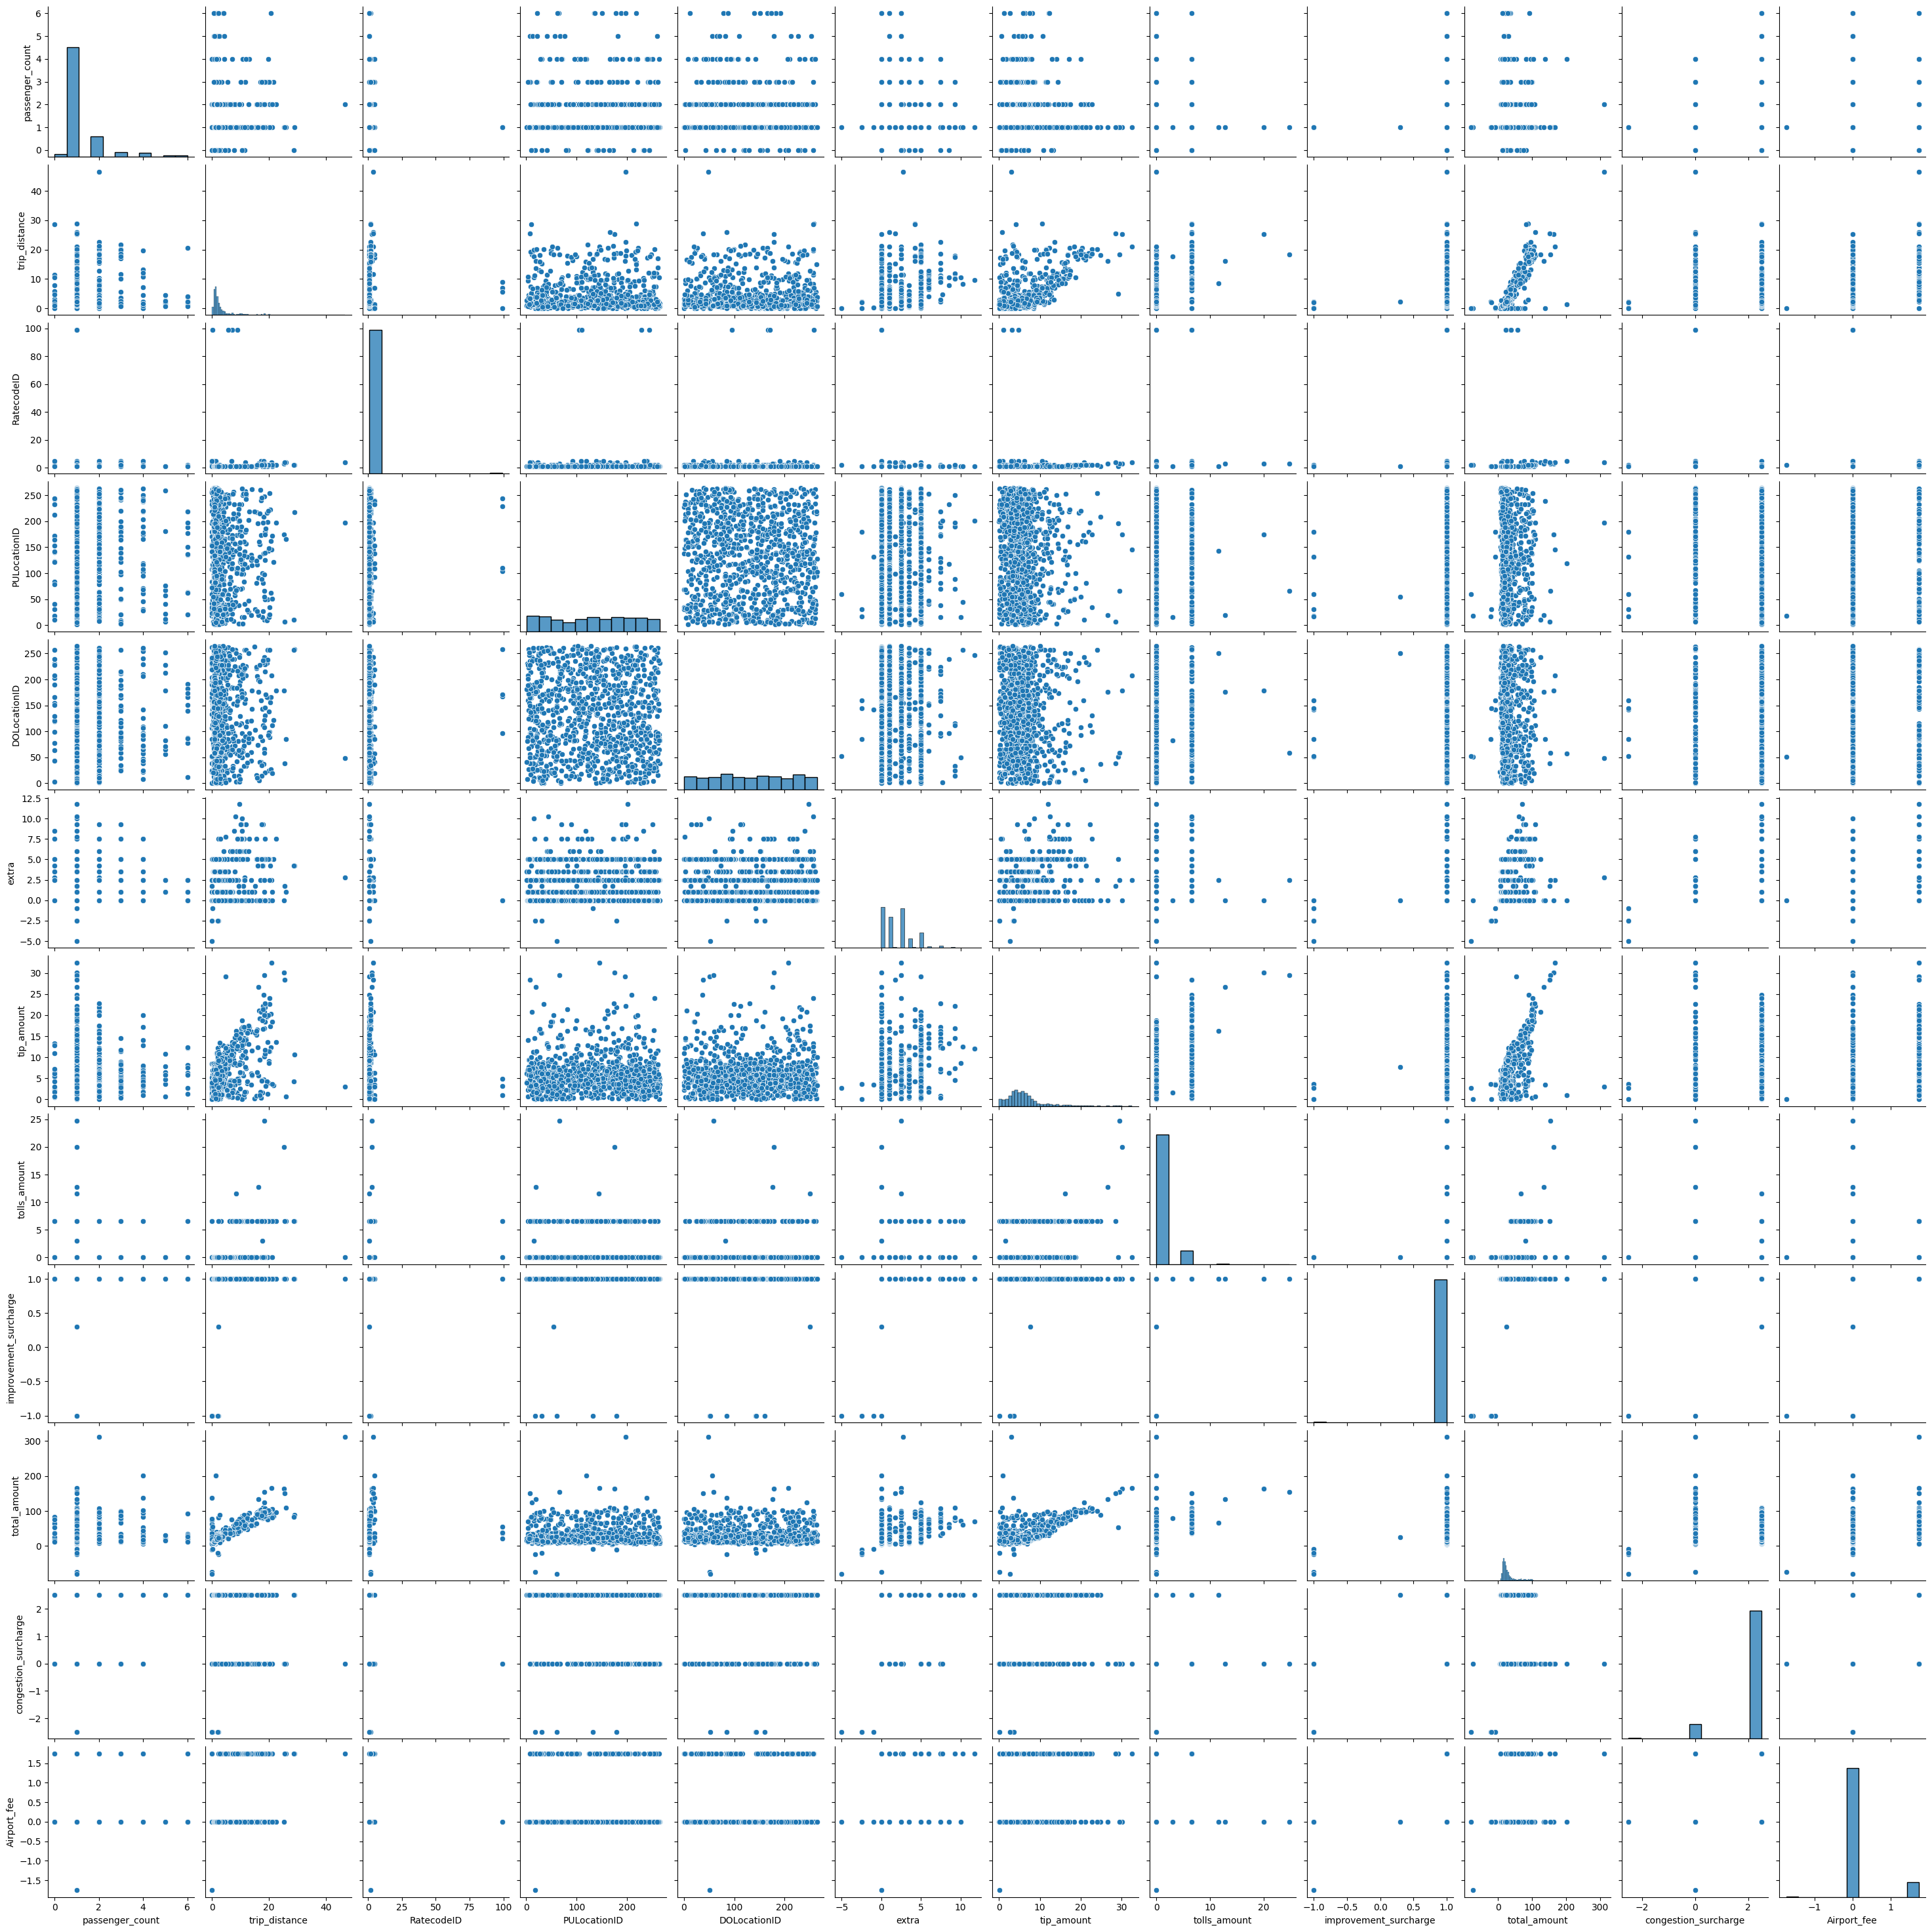

In [49]:
numerical_columns = ['passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
pairplot_sample=exploration_set.sample(n=1000, random_state=42)
numerical_data = pairplot_sample[numerical_columns]
sns.pairplot(numerical_data)
plt.show()

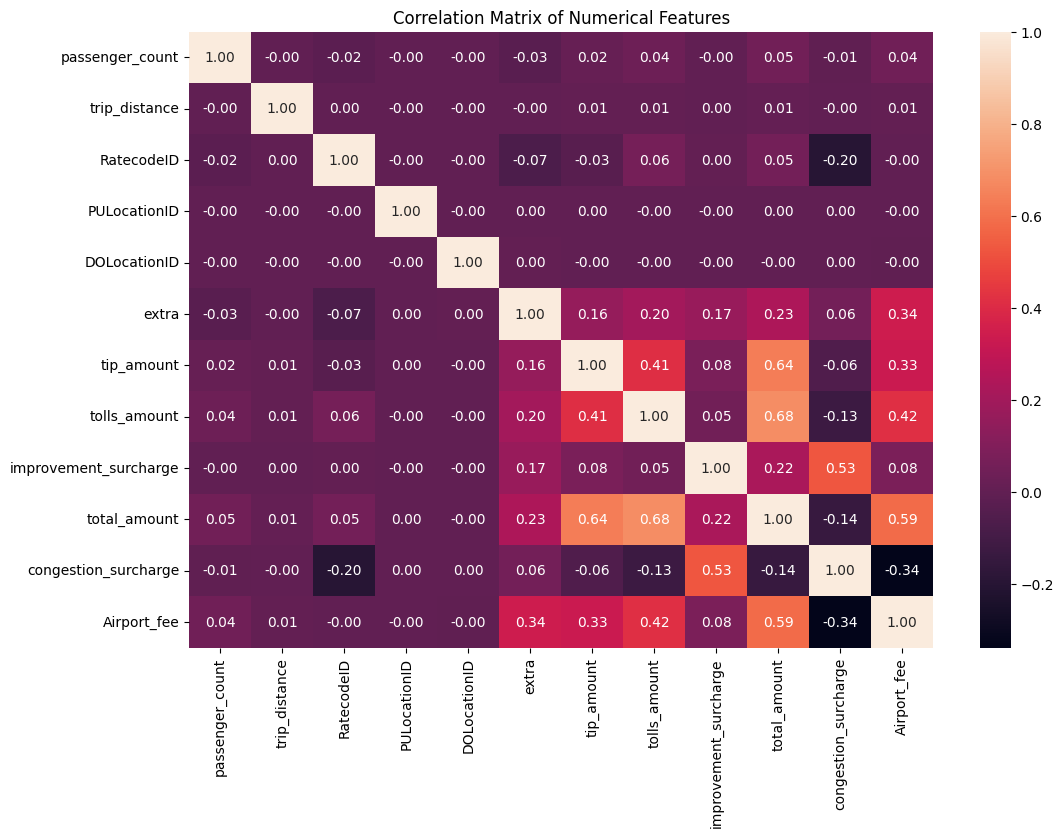

In [50]:
correlation_matrix=exploration_set[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Feature engineering

In [51]:
exploration_set['tpep_pickup_datetime'] = pd.to_datetime(exploration_set['tpep_pickup_datetime'])

exploration_set['pickup_hour_of_day'] = exploration_set['tpep_pickup_datetime'].dt.hour
exploration_set['pickup_day_of_week'] = exploration_set['tpep_pickup_datetime'].dt.dayofweek



exploration_set['tpep_dropoff_datetime'] = pd.to_datetime(exploration_set['tpep_dropoff_datetime'])

exploration_set['dropoff_hour_of_day'] = exploration_set['tpep_dropoff_datetime'].dt.hour
exploration_set['dropoff_day_of_week'] = exploration_set['tpep_dropoff_datetime'].dt.dayofweek

exploration_set['duration'] = (exploration_set['tpep_dropoff_datetime'] - exploration_set['tpep_pickup_datetime']).dt.total_seconds() / 60

exploration_set.drop(["tpep_pickup_datetime","tpep_dropoff_datetime"], axis=1, inplace=True)

*Preprocessing pipeline step 3: feature engineer the 2 date columns into hour and day for each of the 2 columns and also, add a duration column*

In [52]:
exploration_set.info()
exploration_set["duration"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   passenger_count        175000 non-null  float64
 2   trip_distance          175000 non-null  float64
 3   RatecodeID             175000 non-null  float64
 4   PULocationID           175000 non-null  int64  
 5   DOLocationID           175000 non-null  int64  
 6   payment_type           175000 non-null  object 
 7   extra                  175000 non-null  float64
 8   tip_amount             175000 non-null  float64
 9   tolls_amount           175000 non-null  float64
 10  improvement_surcharge  175000 non-null  float64
 11  total_amount           175000 non-null  float64
 12  congestion_surcharge   175000 non-null  float64
 13  Airport_fee            175000 non-null  float64
 14  pickup_hour_of_day     175000 non-nu

duration
 9.033333      41
 18.216667     41
 12.866667     37
 5.683333      37
 22.266667     37
               ..
 121.283333     1
 140.950000     1
-96.483333      1
 135.733333     1
-106.833333     1
Name: count, Length: 15215, dtype: int64

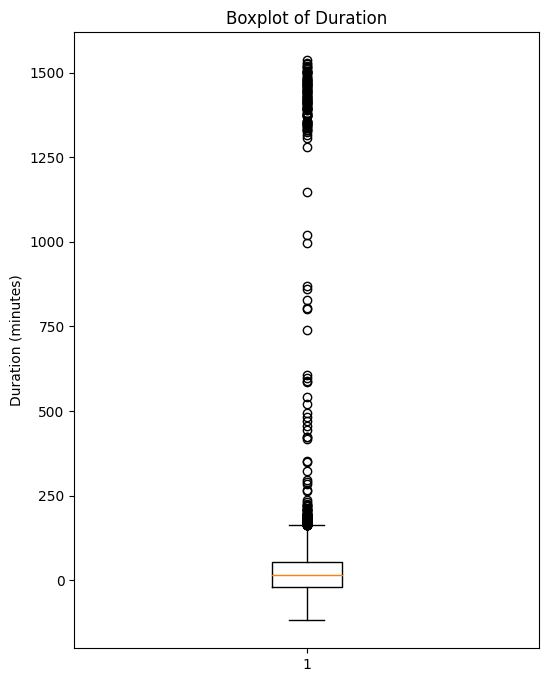

In [53]:
plt.figure(figsize=(6, 8))
plt.boxplot(exploration_set['duration'])
plt.title('Boxplot of Duration')
plt.ylabel('Duration (minutes)')
plt.show()

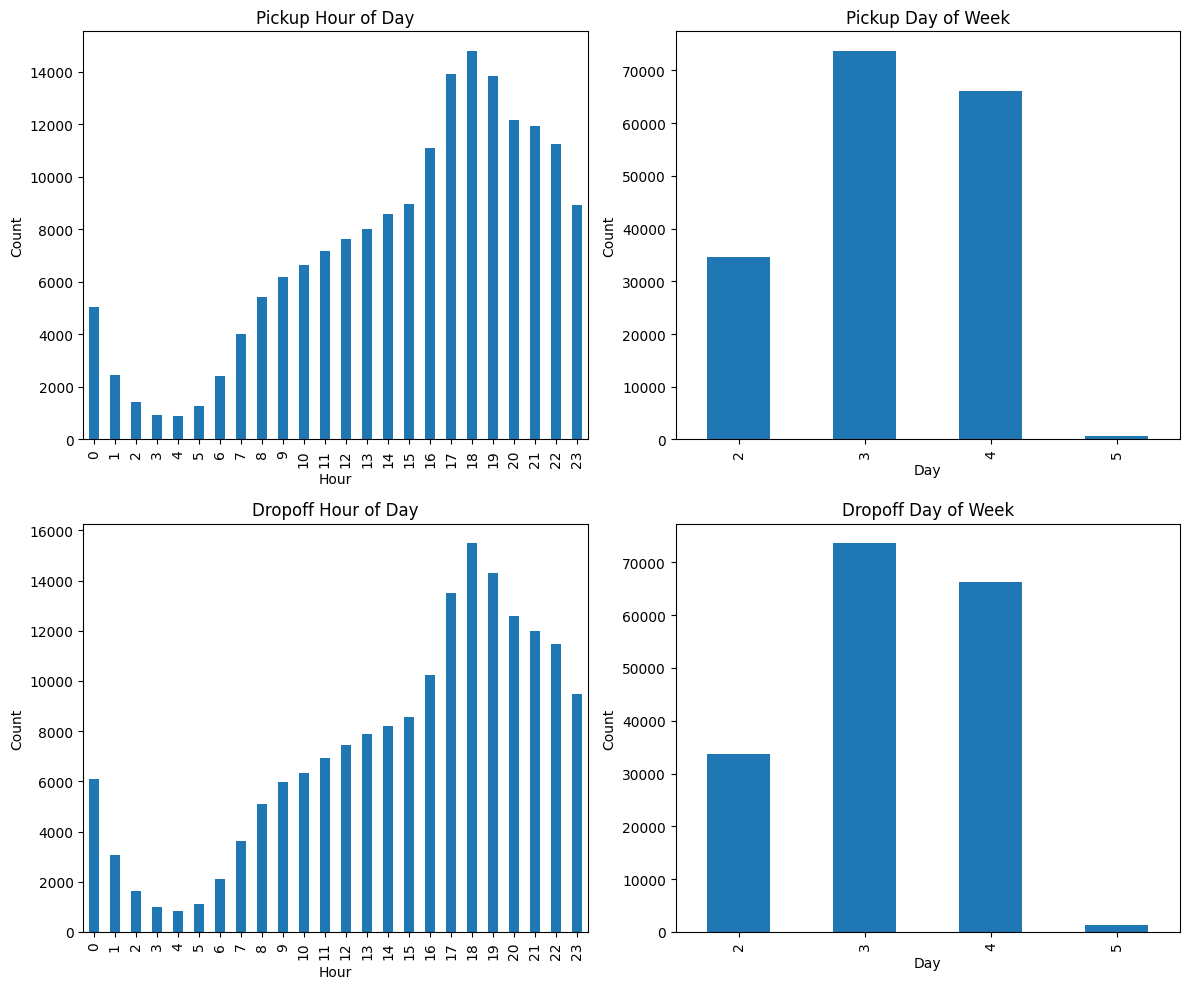

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Bar plots for pickup_hour_of_day, pickup_day_of_week, dropoff_hour_of_day, dropoff_day_of_week
exploration_set['pickup_hour_of_day'].value_counts().sort_index().plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('Pickup Hour of Day')
axs[0, 0].set_xlabel('Hour')
axs[0, 0].set_ylabel('Count')

exploration_set['pickup_day_of_week'].value_counts().sort_index().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Pickup Day of Week')
axs[0, 1].set_xlabel('Day')
axs[0, 1].set_ylabel('Count')

exploration_set['dropoff_hour_of_day'].value_counts().sort_index().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Dropoff Hour of Day')
axs[1, 0].set_xlabel('Hour')
axs[1, 0].set_ylabel('Count')

exploration_set['dropoff_day_of_week'].value_counts().sort_index().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Dropoff Day of Week')
axs[1, 1].set_xlabel('Day')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Encoding categorical variables

The column "payment_type" is a categorical variable that needs to be encoded.

In [55]:
exploration_set["payment_type"].value_counts()

payment_type
Credit Card    135257
Cash            30141
Wallet           6077
unknown          2333
UPI              1192
Name: count, dtype: int64

In [56]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
payment_encoded = encoder.fit_transform(exploration_set[['payment_type']])

encoded_columns = encoder.get_feature_names_out(input_features=['payment_type'])

payment_encoded_df = pd.DataFrame(payment_encoded, columns=encoded_columns, index=exploration_set.index)

exploration_set = pd.concat([exploration_set.drop(columns=['payment_type']), payment_encoded_df], axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


*Preprocessing pipeline step4: one-hot-encode the categorical column "payment_type"*

In [57]:
exploration_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   VendorID                  175000 non-null  int64  
 1   passenger_count           175000 non-null  float64
 2   trip_distance             175000 non-null  float64
 3   RatecodeID                175000 non-null  float64
 4   PULocationID              175000 non-null  int64  
 5   DOLocationID              175000 non-null  int64  
 6   extra                     175000 non-null  float64
 7   tip_amount                175000 non-null  float64
 8   tolls_amount              175000 non-null  float64
 9   improvement_surcharge     175000 non-null  float64
 10  total_amount              175000 non-null  float64
 11  congestion_surcharge      175000 non-null  float64
 12  Airport_fee               175000 non-null  float64
 13  pickup_hour_of_day        175000 non-null  i

# **Transforming the test data**

**Preprocessing pipeline**

In [58]:
test.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1779
trip_distance               0
RatecodeID               1779
store_and_fwd_flag       1779
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     1779
Airport_fee              1779
dtype: int64

In [59]:
copy_test=test.copy()

In [60]:
# drop flag:


copy_test.drop("store_and_fwd_flag", axis=1, inplace=True)





# impute:
copy_test["RatecodeID"]=rate_code_id_imputer.fit_transform(copy_test[["RatecodeID"]])
copy_test["passenger_count"]=passenger_count_imputer.fit_transform(copy_test[["passenger_count"]])
copy_test["congestion_surcharge"]=congestion_surcharge_imputer.fit_transform(copy_test[["congestion_surcharge"]])
copy_test["Airport_fee"]=airport_fee_imputer.fit_transform(copy_test[["Airport_fee"]])





# feature engineering:
copy_test['tpep_pickup_datetime'] = pd.to_datetime(copy_test['tpep_pickup_datetime'])

copy_test['pickup_hour_of_day'] = copy_test['tpep_pickup_datetime'].dt.hour
copy_test['pickup_day_of_week'] = copy_test['tpep_pickup_datetime'].dt.dayofweek



copy_test['tpep_dropoff_datetime'] = pd.to_datetime(copy_test['tpep_dropoff_datetime'])

copy_test['dropoff_hour_of_day'] = copy_test['tpep_dropoff_datetime'].dt.hour
copy_test['dropoff_day_of_week'] = copy_test['tpep_dropoff_datetime'].dt.dayofweek

copy_test['duration'] = (copy_test['tpep_dropoff_datetime'] - copy_test['tpep_pickup_datetime']).dt.total_seconds() / 60

copy_test.drop(["tpep_pickup_datetime","tpep_dropoff_datetime"], axis=1, inplace=True)





# encoding:
payment_encoded = encoder.fit_transform(copy_test[['payment_type']])

encoded_columns = encoder.get_feature_names_out(input_features=['payment_type'])

payment_encoded_df = pd.DataFrame(payment_encoded, columns=encoded_columns, index=copy_test.index)

copy_test = pd.concat([copy_test.drop(columns=['payment_type']), payment_encoded_df], axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [61]:
copy_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   VendorID                  50000 non-null  int64  
 1   passenger_count           50000 non-null  float64
 2   trip_distance             50000 non-null  float64
 3   RatecodeID                50000 non-null  float64
 4   PULocationID              50000 non-null  int64  
 5   DOLocationID              50000 non-null  int64  
 6   extra                     50000 non-null  float64
 7   tip_amount                50000 non-null  float64
 8   tolls_amount              50000 non-null  float64
 9   improvement_surcharge     50000 non-null  float64
 10  congestion_surcharge      50000 non-null  float64
 11  Airport_fee               50000 non-null  float64
 12  pickup_hour_of_day        50000 non-null  int32  
 13  pickup_day_of_week        50000 non-null  int32  
 14  dropof

In [62]:
y_train=exploration_set["total_amount"]
x_train=exploration_set.drop(["total_amount"],axis=1)

# **Model building**

**Linear Regression**

Although the correlation matrix and the pairplot indicate towards a non-linear relationship among features and the target variable, I have chosen LinearRegression as a baseline model because it can help with interpretation of coefficients and since majority of the numerical columns which have a significant correlation with the target contain outliers and it is robust to outliers in linear relations.

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lin_reg=LinearRegression()

In [64]:
lin_reg.fit(x_train, y_train)
lin_reg_train_pred=lin_reg.predict(x_train)
lin_reg_train_r2=r2_score(y_train,lin_reg_train_pred)
print(lin_reg_train_r2)

0.728694569317748


In [65]:
lin_reg.feature_names_in_

array(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'congestion_surcharge',
       'Airport_fee', 'pickup_hour_of_day', 'pickup_day_of_week',
       'dropoff_hour_of_day', 'dropoff_day_of_week', 'duration',
       'payment_type_Credit Card', 'payment_type_UPI',
       'payment_type_Wallet', 'payment_type_unknown'], dtype=object)

In [66]:
lin_reg.coef_

array([ 6.58597606e-01,  4.45713606e-01,  1.46658748e-04,  1.20436120e-01,
        4.95145268e-04,  1.21190974e-04, -1.11208850e-01,  2.20593361e+00,
        4.25625686e+00,  2.67667310e+01, -2.52325076e+00,  1.21864256e+01,
        9.86799599e-02,  1.18609842e+00, -5.59172235e-02, -1.47824931e+00,
        2.63966419e-02, -4.75187509e+00, -1.57239316e+00,  1.10046338e+00,
       -6.75118258e-01])

In [67]:
import numpy as np

feature_names_in_ = np.array(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'congestion_surcharge',
       'Airport_fee', 'pickup_hour_of_day', 'pickup_day_of_week',
       'dropoff_hour_of_day', 'dropoff_day_of_week', 'duration',
       'payment_type_Credit Card', 'payment_type_UPI',
       'payment_type_Wallet', 'payment_type_unknown'])

coefficients = np.array([ 6.58597606e-01,  4.45713606e-01,  1.46658748e-04,  1.20436120e-01,
    4.95145268e-04,  1.21190974e-04, -1.11208850e-01,  2.20593361e+00,
    4.25625686e+00,  2.67667310e+01, -2.52325076e+00,  1.21864256e+01,
    9.86799599e-02,  1.18609842e+00, -5.59172235e-02, -1.47824931e+00,
    2.63966419e-02, -4.75187509e+00, -1.57239316e+00,  1.10046338e+00,
    -6.75118258e-01])

# Find feature names with coefficients close to zero
close_to_zero_features = feature_names_in_[np.abs(coefficients) < 0.1]
print(close_to_zero_features)

['trip_distance' 'PULocationID' 'DOLocationID' 'pickup_hour_of_day'
 'dropoff_hour_of_day' 'duration']


The coefficients close to zero indicate that the features can be non-linearly related, so the next model to try should be able to handle non-linear relationships as well.

In [68]:
lin_reg_test_pred=lin_reg.predict(copy_test)

LinearRegression Submission score: 0.71005

**Decision Tree Regression**

Decision trees are a good choice due to their inherent capability to handle nonlinear relationships and interactions within the data.

In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
dec_tree=DecisionTreeRegressor(random_state=42)

In [70]:
dec_tree.fit(x_train, y_train)
dec_tree_train_pred=dec_tree.predict(x_train)
r2_score(y_train, dec_tree_train_pred)

1.0

In [71]:
dec_tree_test_pred=dec_tree.predict(copy_test)

DecisionTreeRegressor submission score: 0.90036

The models that capture non-linear relations are promising, hyperparameter tuning for this model can further improve the score. Further, one of the ensemble methods can be tried to enhance the score.

**DecisionTreeRegressor hyperparameter tuning**

In [72]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeRegressor

# dec_tree_param_grid = {
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# dec_tree_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), dec_tree_param_grid, cv=5, scoring='r2')

# dec_tree_grid_search.fit(x_train, y_train)

# dec_tree_best_params = dec_tree_grid_search.best_params_
# dec_tree_best_score = dec_tree_grid_search.best_score_

# dec_tree_best_model = dec_tree_grid_search.best_estimator_

In [73]:
# dec_tree_best_params

In [74]:
dec_tree_best_model=DecisionTreeRegressor(random_state=42, max_depth=15, min_samples_leaf=4, min_samples_split=10)

In [75]:
dec_tree_best_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

In [76]:
dec_tree_train_pred=dec_tree_best_model.predict(x_train)
dec_tree_test_pred=dec_tree_best_model.predict(copy_test)
r2_score(y_train, dec_tree_train_pred)

0.9648884795975525

DecisionTreeRegressor submission score after hyperparameter tuning: 0.92067

Although upon further finetuning, this model will perform better, but the difference between training and test r2_scores indicate a minor case of overfitting, to handle this, the next model of choice will be an ensemble method.

**Random Forest Regression**

Random forest regression is well-suited for capturing complex relationships in the data due to its ability to handle non-linearities and interactions between features.

In [77]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor(random_state=42)
random_forest.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [78]:
random_forest_train_pred=random_forest.predict(x_train)
r2_score(y_train, random_forest_train_pred)

0.9921662799250872

In [79]:
random_forest_test_pred=random_forest.predict(copy_test)

RandomForestRegressor submission score: 0.90036

**RandomForestRegressor hyperparameter tuning**

In [80]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor

# param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

# rf = RandomForestRegressor(random_state=42)

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
# grid_search.fit(x_train, y_train)

# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# best_rf_model = grid_search.best_estimator_

In [81]:
random_forest_tuned=RandomForestRegressor(random_state=42, max_depth=20, n_estimators=200)
random_forest_tuned.fit(x_train, y_train)
random_forest_train_pred=random_forest_tuned.predict(x_train)
r2_score(y_train, random_forest_train_pred)

0.9876670680932196

In [82]:
random_forest_test_pred=random_forest_tuned.predict(copy_test)

RandomForestRegressor submission score after hyperparameter tuning: 0.94197

**XGBoost Regressor**

Given XGBoost's efficiency and its inherent capability to handle complex relationships, the decision was made to shift focus to XGBoost Regressor for further improvements and optimizations rather than spending more effort on RandomForestRegressor.

In [83]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
xgb=XGBRegressor(random_state=42)
xgb.fit(x_train,y_train)
xgb_train_pred=xgb.predict(x_train)
r2_score(y_train, xgb_train_pred)

0.9783809292922542

In [84]:
xgb_test_pred=xgb.predict(copy_test)

**XGBRegressor hyperparameter tuning**

In [85]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.05, 0.1, 0.15],
#     'max_depth': [3, 4, 5]
# }

# xgb = XGBRegressor(random_state=42)

# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='r2', cv=5)
# grid_search.fit(x_train, y_train)

# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# print(best_params, best_score)

XGBRegressor submission score: 0.94338

Tuned XGBRegressor

In [86]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
xgb_tuned=XGBRegressor(random_state=42, learning_rate=0.1, max_depth=5, n_estimators=300)
xgb_tuned.fit(x_train, y_train)
xgb_tuned_train_pred=xgb_tuned.predict(x_train)
r2_score(y_train, xgb_tuned_train_pred)

0.9726515968463443

In [87]:
xgb_tuned_test_pred=xgb_tuned.predict(copy_test)

Tuned XGBRegressor submission score: 0.94775

# Model Building Summary

Linear Regression served as a baseline, highlighting interpretability and robustness to outliers, it couldn't capture the complexity of the dataset, resulting in a lower score (r2_score: 0.71005). DecisionTreeRegressor performed better (r2_score: 0.92067) but showed signs of minor overfitting. RandomForestRegressor, utilizing the ensemble method, scored impressively (r2_score: 0.94197) after hyperparameter tuning. The XGBoost Regressor outperformed all models, exhibiting higher accuracy (r2_score: 0.94775) and showcasing the ability to handle complex relationships within the data. Its efficiency and accuracy make it a promising choice for predictive modeling in this context.

In [88]:
sample.head()

,ID,total_amount
0,1,24.456348
1,2,24.374058
2,3,19.878154
3,4,25.015569
4,5,22.252489


In [89]:
sample.shape

(1000, 2)

In [90]:
submission = pd.DataFrame(columns=['ID', 'total_amount'])
submission['ID']=[i for i in range(1,test.shape[0]+1)]

In [91]:
submission["total_amount"]=xgb_tuned_test_pred

In [92]:
submission.to_csv('submission.csv', index=False)